In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('data olah.csv')
data = data.drop('Unnamed: 0', axis = 1)

In [3]:
data.drop(data.columns[2410:3579], axis=1, inplace=True)
data.head(5)

,3847.6904,3848.5764,3849.4626,3850.349,3851.2358,3852.1228,3853.0098,3853.897,3854.7847,3855.6724,...,6688.059,6689.5996,6691.14,6692.6807,6694.222,6695.7637,6697.3057,6698.8477,6700.3906,wd_subclass
0,24.728888,27.64467,24.893251,27.215405,26.310278,24.307577,29.245514,29.070126,30.490877,35.01845,...,17.665596,17.521635,18.051397,17.52665,17.180534,17.99281,17.179358,17.089285,17.443895,DA
1,1290.423500,1190.24150,1224.700700,1160.337400,1100.303100,1088.031500,1152.384600,1154.704500,1115.064600,1319.14640,...,150.075820,150.250370,142.590470,143.92473,148.038850,154.53412,153.505140,149.336000,144.941860,DA
2,9819.987000,9687.30800,9957.726000,9896.959000,10370.940000,10643.110000,10709.778000,11047.445000,11019.559000,10969.06800,...,1462.006700,1473.770300,1483.637200,1470.29220,1457.449600,1450.70750,1469.381200,1475.331200,1460.837900,DA
3,1093.884500,1043.11580,1102.687500,1149.345100,1114.538500,1140.821400,1153.040000,1195.502800,1167.717200,1147.95520,...,136.972170,140.127240,140.010470,140.37068,137.124980,138.57338,135.967210,135.260400,138.557480,DA
4,1945.595200,1919.27200,1890.047000,2007.562900,1974.344600,1933.755500,2028.300500,2040.959200,2060.863300,2075.57150,...,211.261810,214.697770,217.529720,214.75264,221.029900,217.97780,217.672780,212.324870,216.794740,DA


In [4]:
dadaz = [
    'DA' 
]

data['wd_subclass'] = np.where(data['wd_subclass'].isin(dadaz), 1, 0)

In [5]:
data['wd_subclass'].value_counts(normalize=True)*100

1    57.336078
0    42.663922
Name: wd_subclass, dtype: float64

# TTS

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = data.drop('wd_subclass', axis=1)
y = data['wd_subclass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
X_train.shape, X_test.shape

((2720, 2410), (681, 2410))

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score


rfc = RandomForestClassifier(n_estimators=500, max_features = 25)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_features=25, n_estimators=500)

In [10]:
arr_feature_importances = rfc.feature_importances_
arr_feature_names = X_train.columns.values
    
df_feature_importance = pd.DataFrame(index=range(len(arr_feature_importances)), columns=['feature', 'importance'])
df_feature_importance['feature'] = arr_feature_names
df_feature_importance['importance'] = arr_feature_importances
df_all_features = df_feature_importance.sort_values(by='importance', ascending=False)
df_all_features.head(3)

,feature,importance
47,3889.5566,0.006068
46,3888.6611,0.005956
53,3894.934,0.005306


In [11]:
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

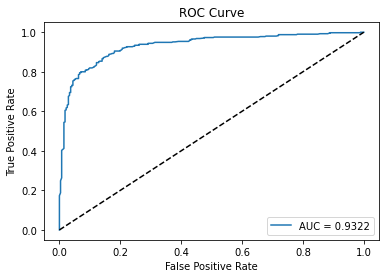

In [12]:
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

In [14]:
roccurve = pd.DataFrame({'fpr' : fpr,
                  'tpr' : tpr,
                  'threshold' : tr})
roccurve[(roccurve.threshold >= 0.5) & (roccurve.threshold <= 0.52)]

,fpr,tpr,threshold
110,0.154982,0.878049,0.514
111,0.158672,0.878049,0.510
112,0.162362,0.882927,0.508
113,0.162362,0.887805,0.504
114,0.169742,0.890244,0.502
115,0.173432,0.892683,0.500


In [15]:
roccurve[(roccurve.threshold >= 0.8) & (roccurve.threshold <= 0.82)]

,fpr,tpr,threshold
58,0.03321,0.687805,0.820
59,0.03321,0.695122,0.816
60,0.03690,0.695122,0.810
61,0.03690,0.700000,0.806


In [16]:
roccurve[(roccurve.threshold >= 0.3) & (roccurve.threshold <= 0.32)]

,fpr,tpr,threshold
158,0.428044,0.960976,0.320
159,0.431734,0.960976,0.318
160,0.431734,0.963415,0.316
161,0.435424,0.963415,0.314
162,0.435424,0.965854,0.312
163,0.439114,0.965854,0.308
164,0.446494,0.965854,0.306
165,0.450185,0.968293,0.304
166,0.457565,0.968293,0.300


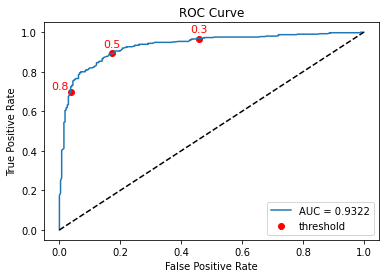

In [36]:
plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')


plt.scatter(x = 0.173432, y = 0.892683, color = 'r',  label = 'threshold')
plt.annotate('0.5', xy=[0.173432, 0.922683],  ha = 'center', color='r', size = 11)

plt.scatter(x = 0.03690, y = 0.700000, color = 'r')
plt.annotate('0.8', xy=[0.0030, 0.710000],  ha = 'center', color='r', size = 11)

plt.scatter(x = 0.457565, y = 0.968293, color = 'r')
plt.annotate('0.3', xy=[0.457565, 0.998293],  ha = 'center', color='r', size = 11)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
#plt.grid()

In [41]:
nilaitest = pd.read_csv('nilai test.csv')
nilaitest.head(3)

,Unnamed: 0,y_pred_proba,y_pred
0,0,0.950,1
1,1,0.952,1
2,2,0.372,0


Text(0.5, 0, 'Predicted Probability')

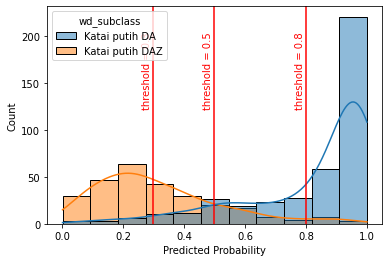

In [44]:

sns.histplot(x=nilaitest.y_pred_proba, kde=True, hue = dh.wd_subclass)

plt.axvline(x = 0.5, color = 'r', label = 'threshold = 0.5')
plt.axvline(x = 0.3, color = 'r', label = 'threshold = 0.3')
plt.axvline(x = 0.8, color = 'r', label = 'threshold = 0.8')

plt.annotate('threshold = 0.5', xy=[0.48, 125],  ha = 'center', rotation = 90, color='r', size = 10)
plt.annotate('threshold = 0.3', xy=[0.28, 125],  ha = 'center', rotation = 90, color='r', size = 10)
plt.annotate('threshold = 0.8', xy=[0.78, 125],  ha = 'center', rotation = 90, color='r', size = 10)

plt.xlabel('Predicted Probability')
#plt.grid()

In [46]:
kelas = []
for i in dh.wd_subclass :
    if i == 'Katai putih DA':
        kelas.append('Kelas 1')
    elif i == 'Katai putih DAZ':
        kelas.append('Kelas 0')

Text(0.5, 0, 'Predicted Probability')

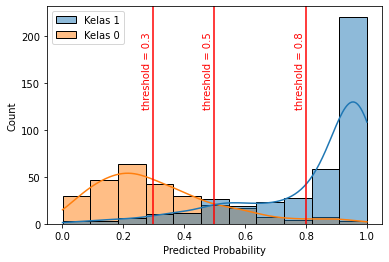

In [47]:

sns.histplot(x=nilaitest.y_pred_proba, kde=True, hue = kelas)

plt.axvline(x = 0.5, color = 'r', label = 'threshold = 0.5')
plt.axvline(x = 0.3, color = 'r', label = 'threshold = 0.3')
plt.axvline(x = 0.8, color = 'r', label = 'threshold = 0.8')

plt.annotate('threshold = 0.5', xy=[0.48, 125],  ha = 'center', rotation = 90, color='r', size = 10)
plt.annotate('threshold = 0.3', xy=[0.28, 125],  ha = 'center', rotation = 90, color='r', size = 10)
plt.annotate('threshold = 0.8', xy=[0.78, 125],  ha = 'center', rotation = 90, color='r', size = 10)

plt.xlabel('Predicted Probability')
#plt.grid()